In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cleantext

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from cleantext import clean
from keras import utils as np_utils
sns.set_style("whitegrid")
import gensim
import re


all_stopwords = gensim.parsing.preprocessing.STOPWORDS

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hotel_review/Final_Data_Clean.csv", encoding='latin')
data['Clean'].astype(str)

0         i angry post available possible sites use plan...
1         no real complaints hotel great great location ...
2         rooms nice elderly bit difficult rooms story n...
3         my room dirty i afraid walk barefoot floor loo...
4         you when i booked company line showed pictures...
                                ...                        
515733              trolly staff help luggage room location
515734    the hotel looks like surely breakfast ok got e...
515735       the ac useless it hot week vienna gave hot air
515736    the rooms enormous comfortable i believe famil...
515737            i rd floor it t work free wife staff kind
Name: Clean, Length: 515738, dtype: object

In [ ]:
# Data Cleaning

data["Reviews"] = data["Reviews"].apply(lambda x: str (x).replace("No Negative", "").replace("No Positive", ""))

In [ ]:
data.drop(['Unnamed: 0','Unnamed: 0.1'], axis= 1, inplace= True)

In [ ]:
def clean_text(text):
    text = " ".join([word for word in text.split()if word not in all_stopwords])
    text = clean(text,no_urls=True,
     no_digits=True,
     no_numbers=False,
     no_punct=True,
     no_currency_symbols=True,
     no_emoji=True,
     replace_with_digit="",replace_with_number="", replace_with_punct="",replace_with_currency_symbol="",)

    return text

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


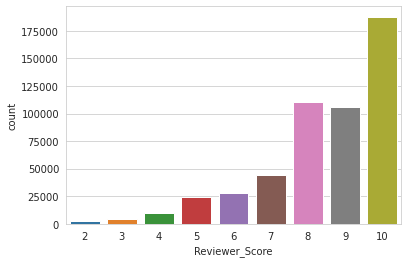

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


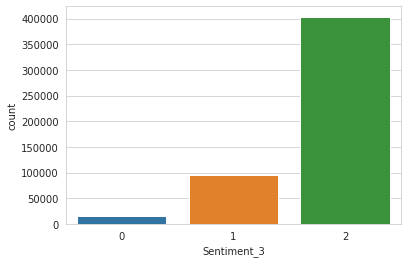

In [ ]:
columns = ['Reviewer_Score','Sentiment_3']
for x in columns:

    sns.countplot(data[x])
    plt.show()

In [ ]:
!pip install scikit-plot

In [ ]:
data['Reviewer_Score'].value_counts(normalize=True)*100

10    36.402980
8     21.358713
9     20.499168
7      8.548527
6      5.390334
5      4.689978
4      1.829611
3      0.854310
2      0.426379
Name: Reviewer_Score, dtype: float64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import scikitplot as skplt
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
data['Clean']=data['Clean'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(data['Clean'], data['Sentiment_3'], test_size = 0.30)
#data['Reviews']= data['Reviews'].astype(str)
#X_train, X_test, y_train, y_test = train_test_split(data['Reviews'], data['Sentiment_2'], test_size = 0.30)

In [ ]:
X_train.shape

(361016,)

In [ ]:
import pandas as pd  
import numpy as np
import time

import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import resample
# plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout, Dense, Embedding, LSTM, SpatialDropout1D, Input, MaxPooling1D,Flatten, GRU, Conv2D, Reshape, MaxPool2D, Concatenate, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Input, Dense, concatenate, Activation
from nltk.corpus import stopwords
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
use_gpu=True
from keras import backend as K
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq_padded = pad_sequences(X_train_seq, maxlen=100)
X_text_seq_padded = pad_sequences(X_test_seq, maxlen=100)

#Converting labels to one hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
size_of_vocabulary = len(tokenizer.word_index)+1

In [ ]:
embedding_file = r'/content/drive/MyDrive/Colab Notebooks/ABCDM-main/glove.6B.100d.txt'

In [ ]:
# loading embeddings

embedding_index = {}
f = open(embedding_file, 'r', errors = 'ignore',encoding='utf8')

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embedding_index[word]=coefs

f.close()
print(f"Loaded {len(embedding_index)} word vectors")

Loaded 400000 word vectors


In [ ]:
len(embedding_index)

400000

In [ ]:
# Creating word matrix for words using embeddings
embedding_matrix = np.zeros((size_of_vocabulary,100))

for word, i in tokenizer.word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# **LSTM**

In [ ]:
from keras.layers import Embedding, LSTM, Bidirectional
model = Sequential()
#model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100, weights = [embedding_matrix], trainable = False))
model.add(Embedding(input_dim=size_of_vocabulary,output_dim=100))
model.add(LSTM(64,return_sequences=False))
#model.add(LSTM(32))
model.add(Dropout(0.1))

# model.add(Bidirectional(LSTM(16, recurrent_dropout =0.2)))
# model.add(AttentionWithContext())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 100)         6380600   
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 99        
Total params: 6,425,019
Trainable params: 6,425,019
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(Adam(lr = 0.00005), loss = 'categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

In [ ]:
history_LSTM = model.fit(X_train_seq_padded, y_train, batch_size=512, epochs=10,
                         validation_data=(X_text_seq_padded, y_test), verbose = 1)

Epoch 1/10
706/706 [==============================] - 59s 81ms/step - loss: 0.8415 - accuracy: 0.7018 - recall_m: 0.3809 - precision_m: 0.4029 - f1_m: 0.3850 - val_loss: 0.5013 - val_accuracy: 0.7902 - val_recall_m: 0.7769 - val_precision_m: 0.8143 - val_f1_m: 0.7951
Epoch 2/10
706/706 [==============================] - 57s 81ms/step - loss: 0.4684 - accuracy: 0.8082 - recall_m: 0.7806 - precision_m: 0.8312 - f1_m: 0.8050 - val_loss: 0.4228 - val_accuracy: 0.8268 - val_recall_m: 0.8025 - val_precision_m: 0.8430 - val_f1_m: 0.8222
Epoch 3/10
706/706 [==============================] - 58s 81ms/step - loss: 0.4184 - accuracy: 0.8283 - recall_m: 0.8072 - precision_m: 0.8426 - f1_m: 0.8245 - val_loss: 0.4090 - val_accuracy: 0.8311 - val_recall_m: 0.8177 - val_precision_m: 0.8417 - val_f1_m: 0.8295
Epoch 4/10
706/706 [==============================] - 57s 81ms/step - loss: 0.4024 - accuracy: 0.8337 - recall_m: 0.8202 - precision_m: 0.8437 - f1_m: 0.8318 - val_loss: 0.4010 - val_accuracy: 0.8

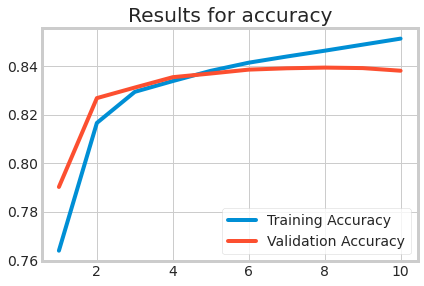

In [ ]:
sns.set_style("whitegrid")
for i in ['accuracy']:
    acc = history_LSTM.history[i]
    val_acc = history_LSTM.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Accuracy')
    plt.plot(epochs, val_acc, label= 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.show()

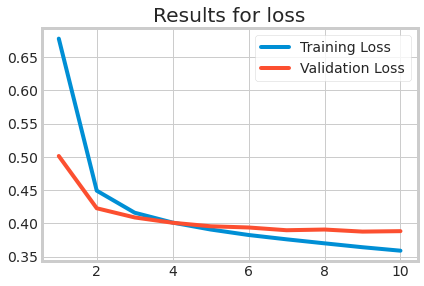

In [ ]:
for i in ['loss']:
    acc = history_LSTM.history[i]
    val_acc = history_LSTM.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Loss')
    plt.plot(epochs, val_acc, label= 'Validation Loss')
    plt.title('Results for {}'.format(i))
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [ ]:
#Generating Classification report
y_pred_LSTM=np.argmax(model.predict(X_text_seq_padded),axis=-1)
y_test_LSTM=np.argmax(y_test,axis=-1)

In [ ]:
print(classification_report(y_test_LSTM,y_pred_LSTM))

              precision    recall  f1-score   support

           0       0.62      0.24      0.34      4712
           1       0.59      0.50      0.55     28648
           2       0.89      0.94      0.91    121362

    accuracy                           0.84    154722
   macro avg       0.70      0.56      0.60    154722
weighted avg       0.82      0.84      0.83    154722



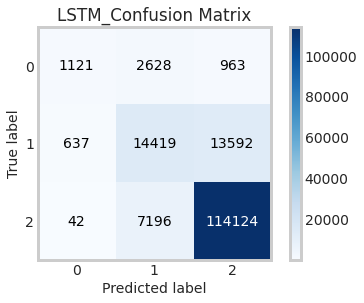

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test_LSTM,y_pred_LSTM,cmap='Blues',title=('LSTM_Confusion Matrix'))

## **BILSTM**

In [ ]:
from keras.layers import Embedding, LSTM, Bidirectional
model = Sequential()
model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100, weights = [embedding_matrix], trainable = False))

#model.add(LSTM(32, recurrent_dropout =0.2))
model.add(Bidirectional(LSTM(16, return_sequences=False)))
#model.add(Bidirectional(LSTM(8)))
model.add(Dropout(0.1))

# model.add(AttentionWithContext())
# model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         6374800   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                14976     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 6,389,875
Trainable params: 15,075
Non-trainable params: 6,374,800
_________________________________________________________________


In [ ]:
model.compile(Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

In [ ]:
history_BiLSTM = model.fit(X_train_seq_padded, y_train, batch_size=512, epochs=20,
                         validation_data=(X_text_seq_padded, y_test), verbose = 1)

Epoch 1/20
706/706 [==============================] - 16s 19ms/step - loss: 0.7587 - accuracy: 0.7721 - recall_m: 0.5371 - precision_m: 0.7500 - f1_m: 0.5703 - val_loss: 0.5056 - val_accuracy: 0.7947 - val_recall_m: 0.7485 - val_precision_m: 0.8311 - val_f1_m: 0.7876
Epoch 2/20
706/706 [==============================] - 13s 18ms/step - loss: 0.4938 - accuracy: 0.8004 - recall_m: 0.7645 - precision_m: 0.8275 - f1_m: 0.7947 - val_loss: 0.4639 - val_accuracy: 0.8087 - val_recall_m: 0.7811 - val_precision_m: 0.8300 - val_f1_m: 0.8048
Epoch 3/20
706/706 [==============================] - 13s 18ms/step - loss: 0.4593 - accuracy: 0.8118 - recall_m: 0.7837 - precision_m: 0.8336 - f1_m: 0.8078 - val_loss: 0.4460 - val_accuracy: 0.8143 - val_recall_m: 0.7859 - val_precision_m: 0.8355 - val_f1_m: 0.8099
Epoch 4/20
706/706 [==============================] - 13s 18ms/step - loss: 0.4415 - accuracy: 0.8182 - recall_m: 0.7928 - precision_m: 0.8375 - f1_m: 0.8145 - val_loss: 0.4329 - val_accuracy: 0.8

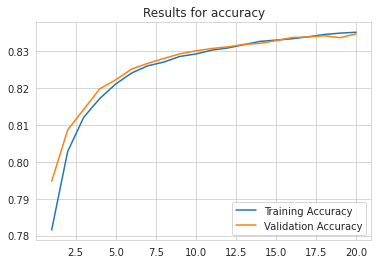

In [ ]:
sns.set_style("whitegrid")
for i in ['accuracy']:
    acc = history_BiLSTM.history[i]
    val_acc = history_BiLSTM.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Accuracy')
    plt.plot(epochs, val_acc, label= 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.show()

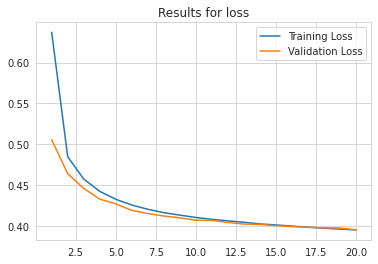

In [ ]:
for i in ['loss']:
    acc = history_BiLSTM.history[i]
    val_acc = history_BiLSTM.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Loss')
    plt.plot(epochs, val_acc, label= 'Validation Loss')
    plt.title('Results for {}'.format(i))
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [ ]:
#Generating Classification report
y_pred_Bi=np.argmax(model.predict(X_text_seq_padded),axis=-1)
y_test_Bi=np.argmax(y_test,axis=-1)

In [ ]:
print(classification_report(y_test_Bi,y_pred_Bi))

              precision    recall  f1-score   support

           0       0.59      0.18      0.28      4698
           1       0.61      0.46      0.52     28952
           2       0.88      0.95      0.91    121072

    accuracy                           0.83    154722
   macro avg       0.69      0.53      0.57    154722
weighted avg       0.82      0.83      0.82    154722



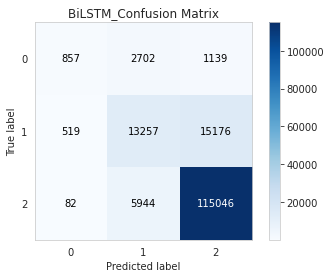

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test_Bi,y_pred_Bi,cmap='Blues',title=('BiLSTM_Confusion Matrix'))

# **GRU**

In [ ]:
gru_model=Sequential()
gru_model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100, weights = [embedding_matrix], trainable = False))
gru_model.add(GRU(32,return_sequences=False))
gru_model.add(Dropout(0.1))
gru_model.add(Dense(3,activation='softmax'))
gru_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         6374800   
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                12864     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 6,387,763
Trainable params: 12,963
Non-trainable params: 6,374,800
_________________________________________________________________


In [ ]:
gru_model.compile(Adam(lr = 0.0005), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_GRU = gru_model.fit(X_train_seq_padded, y_train, batch_size=510, epochs=20,
                         validation_data=(X_text_seq_padded, y_test), verbose = 2)

Epoch 1/20
708/708 - 10s - loss: 0.5081 - accuracy: 0.8012 - val_loss: 0.4245 - val_accuracy: 0.8231
Epoch 2/20
708/708 - 9s - loss: 0.4171 - accuracy: 0.8268 - val_loss: 0.4049 - val_accuracy: 0.8298
Epoch 3/20
708/708 - 8s - loss: 0.4037 - accuracy: 0.8321 - val_loss: 0.3967 - val_accuracy: 0.8333
Epoch 4/20
708/708 - 8s - loss: 0.3964 - accuracy: 0.8350 - val_loss: 0.3913 - val_accuracy: 0.8357
Epoch 5/20
708/708 - 8s - loss: 0.3915 - accuracy: 0.8372 - val_loss: 0.3878 - val_accuracy: 0.8366
Epoch 6/20
708/708 - 8s - loss: 0.3878 - accuracy: 0.8383 - val_loss: 0.3862 - val_accuracy: 0.8379
Epoch 7/20
708/708 - 8s - loss: 0.3850 - accuracy: 0.8394 - val_loss: 0.3836 - val_accuracy: 0.8387
Epoch 8/20
708/708 - 8s - loss: 0.3825 - accuracy: 0.8405 - val_loss: 0.3829 - val_accuracy: 0.8385
Epoch 9/20
708/708 - 8s - loss: 0.3797 - accuracy: 0.8415 - val_loss: 0.3811 - val_accuracy: 0.8394
Epoch 10/20
708/708 - 8s - loss: 0.3786 - accuracy: 0.8418 - val_loss: 0.3788 - val_accuracy: 0.840

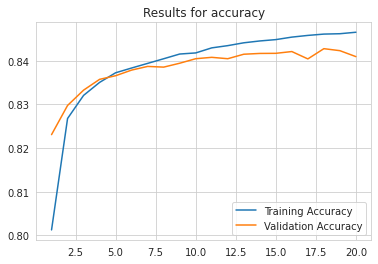

In [ ]:
sns.set_style("whitegrid")
for i in ['accuracy']:
    acc = history_GRU.history[i]
    val_acc = history_GRU.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Accuracy')
    plt.plot(epochs, val_acc, label= 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.show()

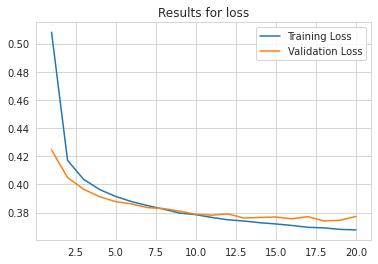

In [ ]:
for i in ['loss']:
    acc = history_GRU.history[i]
    val_acc = history_GRU.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Loss')
    plt.plot(epochs, val_acc, label= 'Validation Loss')
    plt.title('Results for {}'.format(i))
   
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [ ]:
#Generating Classification report
y_pred_GRU=np.argmax(gru_model.predict(X_text_seq_padded),axis=-1)
y_test_GRU=np.argmax(y_test,axis=-1)

In [ ]:
print(classification_report(y_test_GRU,y_pred_GRU))

              precision    recall  f1-score   support

           0       0.61      0.29      0.39      4698
           1       0.60      0.55      0.57     28952
           2       0.90      0.93      0.91    121072

    accuracy                           0.84    154722
   macro avg       0.70      0.59      0.63    154722
weighted avg       0.83      0.84      0.83    154722



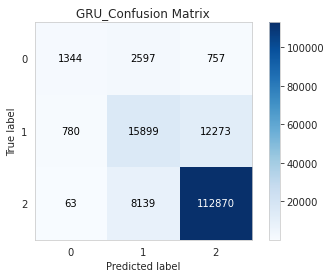

In [ ]:

skplt.metrics.plot_confusion_matrix(y_test_GRU,y_pred_GRU,cmap='Blues',title=('GRU_Confusion Matrix'))

# **CNN**

In [ ]:
from keras.layers import Embedding, LSTM, Bidirectional, Conv1D
model = Sequential()
model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 100, weights = [embedding_matrix], trainable = False))
#model.add(Embedding(input_dim = size_of_vocabulary, output_dim = 128))
model.add(Conv1D(64,4,padding='same',strides=1,activation='relu'))
#model.add(Conv1D(64,3,padding='same',activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 100)         6374800   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          25664     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 6,402,643
Trainable params: 27,843
Non-trainable params: 6,374,800
_______________________________________

In [ ]:
model.compile(Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

In [ ]:
history_CNN = model.fit(X_train_seq_padded, y_train, batch_size=512, epochs=20,
                         validation_data=(X_text_seq_padded, y_test), verbose = 2)

Epoch 1/20
706/706 - 9s - loss: 0.5533 - accuracy: 0.7847 - recall_m: 0.7597 - precision_m: 0.7944 - f1_m: 0.7744 - val_loss: 0.4819 - val_accuracy: 0.8016 - val_recall_m: 0.7766 - val_precision_m: 0.8199 - val_f1_m: 0.7976
Epoch 2/20
706/706 - 8s - loss: 0.4587 - accuracy: 0.8102 - recall_m: 0.7847 - precision_m: 0.8294 - f1_m: 0.8064 - val_loss: 0.4445 - val_accuracy: 0.8134 - val_recall_m: 0.7890 - val_precision_m: 0.8320 - val_f1_m: 0.8099
Epoch 3/20
706/706 - 8s - loss: 0.4342 - accuracy: 0.8191 - recall_m: 0.7934 - precision_m: 0.8382 - f1_m: 0.8151 - val_loss: 0.4308 - val_accuracy: 0.8190 - val_recall_m: 0.7945 - val_precision_m: 0.8370 - val_f1_m: 0.8152
Epoch 4/20
706/706 - 8s - loss: 0.4221 - accuracy: 0.8246 - recall_m: 0.8008 - precision_m: 0.8422 - f1_m: 0.8210 - val_loss: 0.4232 - val_accuracy: 0.8220 - val_recall_m: 0.7982 - val_precision_m: 0.8387 - val_f1_m: 0.8179
Epoch 5/20
706/706 - 8s - loss: 0.4139 - accuracy: 0.8280 - recall_m: 0.8061 - precision_m: 0.8444 - f1_

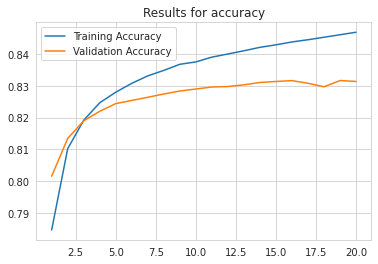

In [ ]:
sns.set_style("whitegrid")
for i in ['accuracy']:
    acc = history_CNN.history[i]
    val_acc = history_CNN.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Accuracy')
    plt.plot(epochs, val_acc, label= 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.show()

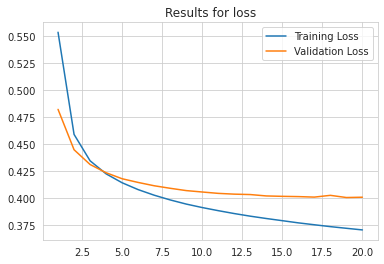

In [ ]:
for i in ['loss']:
    acc = history_CNN.history[i]
    val_acc = history_CNN.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, label= 'Training Loss')
    plt.plot(epochs, val_acc, label= 'Validation Loss')
    plt.title('Results for {}'.format(i))
   
    plt.savefig('Results for {}'.format(i), dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [ ]:
#Generating Classification report
y_pred_CNN=np.argmax(model.predict(X_text_seq_padded),axis=-1)
y_test_CNN=np.argmax(y_test,axis=-1)

In [ ]:
print(classification_report(y_test_CNN,y_pred_CNN))

              precision    recall  f1-score   support

           0       0.59      0.21      0.31      4698
           1       0.58      0.50      0.53     28952
           2       0.88      0.94      0.91    121072

    accuracy                           0.83    154722
   macro avg       0.68      0.55      0.58    154722
weighted avg       0.82      0.83      0.82    154722



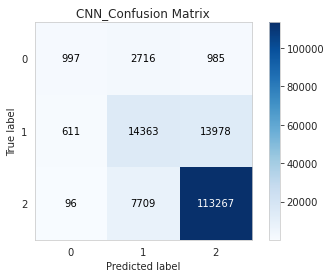

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test_CNN,y_pred_CNN,cmap='Blues',title=('CNN_Confusion Matrix'))